In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv("../data/processed/clean_orders.csv", parse_dates=["order_purchase_timestamp"])
customers = pd.read_csv("../data/processed/clean_customers.csv")
products = pd.read_csv("../data/processed/clean_products.csv")
order_items = pd.read_csv("../data/processed/clean_order_items.csv")
main = pd.read_csv("../data/processed/clean_main_dataset.csv", parse_dates=["order_purchase_timestamp"])

In [3]:
total_revenue = order_items["price"].sum() + order_items["freight_value"].sum()
num_orders = orders["order_id"].nunique()
aov = total_revenue / num_orders

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Number of Orders: {num_orders:,}")
print(f"Average Order Value (AOV): {aov:,.2f}")

Total Revenue: 15,843,553.24
Number of Orders: 99,441
Average Order Value (AOV): 159.33


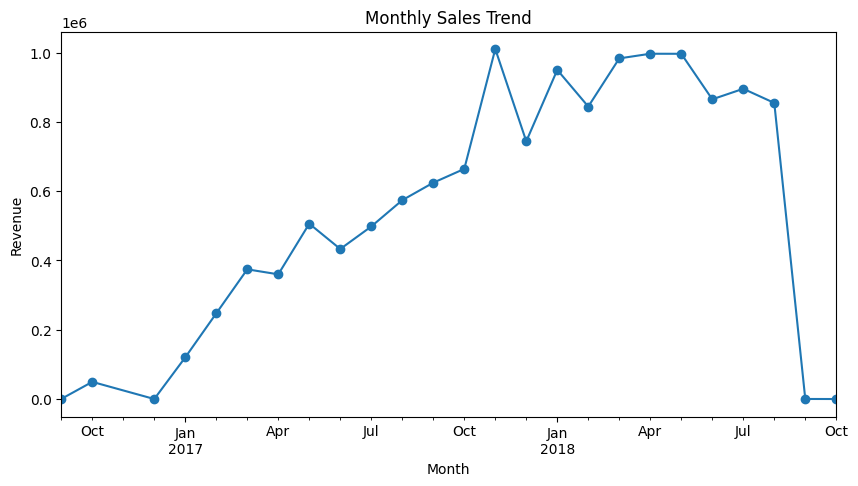

In [4]:
monthly_sales = main.groupby(main["order_purchase_timestamp"].dt.to_period("M"))["order_value"].sum()

monthly_sales.plot(kind="line", figsize=(10,5), marker="o", title="Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()

In [5]:
top_products_qty = order_items.groupby("product_id")["order_item_id"].count().sort_values(ascending=False).head(10)
top_products_rev = order_items.groupby("product_id")["price"].sum().sort_values(ascending=False).head(10)

print("Top 10 Products by Quantity:\n", top_products_qty)
print("\nTop 10 Products by Revenue:\n", top_products_rev)

Top 10 Products by Quantity:
 product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: order_item_id, dtype: int64

Top 10 Products by Revenue:
 product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
3dd2a17168ec895c781a9191c1e95ad7    41082.60
25c38557cf793876c5abdd5931f922db    38907.32
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
53b36df67ebb7c41585e8d54d6772e08    37683.42
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
Name: price, dtype: float64


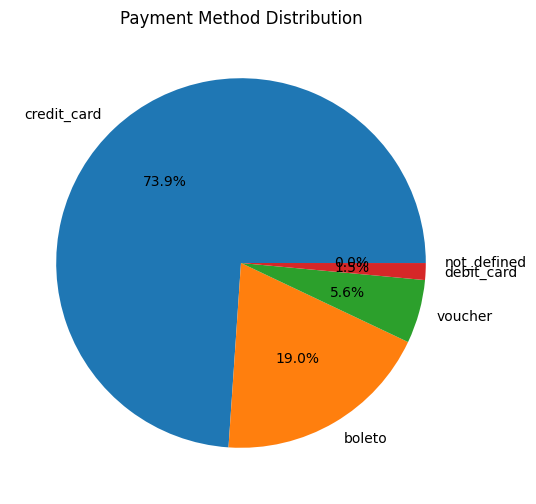

In [6]:
payments = pd.read_csv("../data/processed/clean_order_payments.csv")
payment_dist = payments["payment_type"].value_counts()

payment_dist.plot(
    kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Payment Method Distribution"
)
plt.ylabel("")
plt.show()

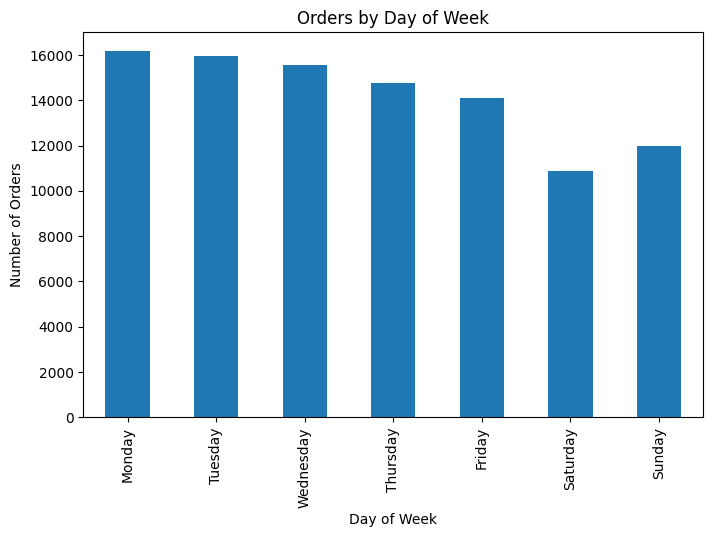

In [7]:
orders["order_weekday"] = orders["order_purchase_timestamp"].dt.day_name()
weekday_sales = orders.groupby("order_weekday")["order_id"].count().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

weekday_sales.plot(kind="bar", figsize=(8,5), title="Orders by Day of Week")
plt.ylabel("Number of Orders")
plt.xlabel("Day of Week")
plt.show()


### Key Insights from Sales Analysis

1. **Revenue Growth:** Monthly sales trend shows strong seasonality, with peaks around holiday months.  
2. **Product Concentration:** A small set of products drive the majority of sales, both in quantity and revenue.  
3. **Payment Preference:** Most customers prefer credit cards, but alternative payment types (like vouchers) are still used.  
